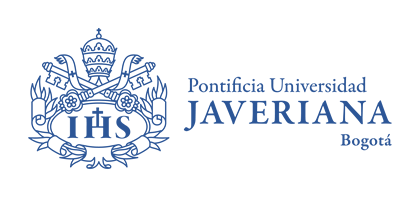

# Técnicas de aprendizaje de máquina - Taller Investigación

## Integrantes
- Andrés García Montoya
- Juan José Gomez Arenas

## **Importación de Biblioteca**
En primer lugar se realizara la importacion de bibliotecas necesarias.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## **Ejemplo Affinity Propagation**

### **Generación de los datos**
En primer lugar se utiliza una funcion llamada make_moons de scikit-learn que permite generar datos que se distribuyen como unas manchas. De esta manera, se genera un dataset simple en 2D para que pueda visualizarse mas facilmente el algoritmo de Affinity propagation


In [22]:
from sklearn.datasets import make_blobs

# Generar un dataset simple en 2D con 5 centros
X, _ = make_blobs(n_samples=200, centers=5, cluster_std=0.6, random_state=0)

# Convertir a DataFrame solo con las características
df = pd.DataFrame(X, columns=['Característica 1', 'Característica 2'])

# Imprimir el DataFrame antes de aplicar el agrupamiento
print("Dataset Generado:")
print(df.head())

Dataset Generado:
   Característica 1  Característica 2
0          1.638527          0.807883
1         -2.466666          9.074156
2          0.743874          4.122406
3         -1.083546          7.300911
4          2.281123          0.238023


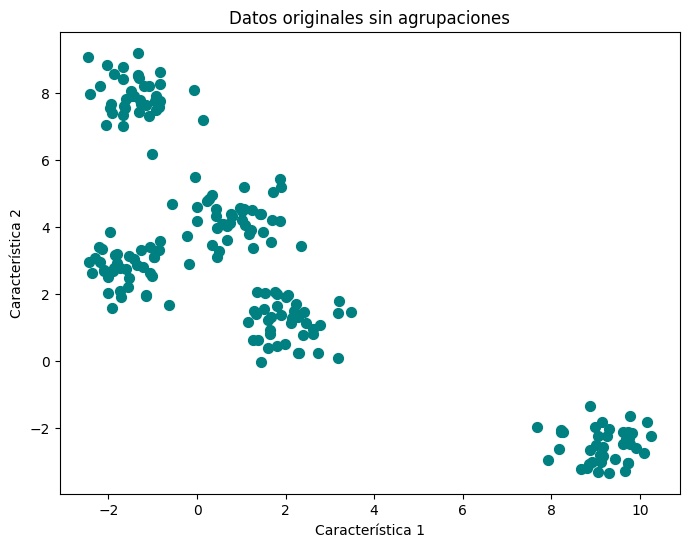

In [31]:
# Visualización inicial de los datos
plt.figure(figsize=(8, 6))
plt.scatter(df['Característica 1'], df['Característica 2'], s=50, color='teal') 
plt.title("Datos originales sin agrupaciones")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

### **Ejecución Algoritmo**
Ahora se realizara la ejecución de el Affinity Propagation directamente con la funcion de scikit-learn.

Que se usa de la forma

```python
af = AffinityPropagation(preference=-10, random_state=0).fit(X)
```

Donde:
- El parámetro  `preference` determina la probabilidad de que cada punto de datos sea seleccionado como un "centro" de un clúster. Para ilustrarlo, si se establece un valor más alto, más puntos tendrán la oportunidad de convertirse en centros de agrupamiento. En contraste, un valor más bajo reduce esa probabilidad. Por lo general, se elige un valor negativo (por ejemplo, -10) para incentivar al algoritmo a identificar menos clústeres, lo que resulta en grupos más definidos y claramente separados.


En este caso, para ilustrar la manera en que afecta el parametro de  `preference` se ejecuto el algoritmo dos veces variando este parametro.

Número estimado de clústeres: 10


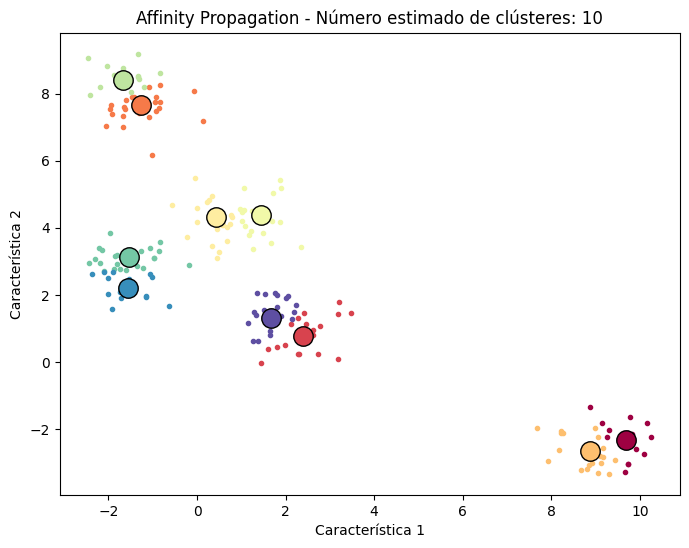

In [35]:
from sklearn.cluster import AffinityPropagation


# Aplicar Affinity Propagation
af = AffinityPropagation(preference=-10, random_state=0).fit(X)
df['Etiqueta Agrupada'] = af.labels_
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)

# Mostrar el número de clústeres encontrados
print(f"Número estimado de clústeres: {n_clusters}")

# Visualización de los resultados del agrupamiento
plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

for k, col in zip(range(n_clusters), colors):
    class_members = (df['Etiqueta Agrupada'] == k)
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(df.loc[class_members, 'Característica 1'], df.loc[class_members, 'Característica 2'], '.', color=col)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

plt.title(f"Affinity Propagation - Número estimado de clústeres: {n_clusters}")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

Número estimado de clústeres: 5


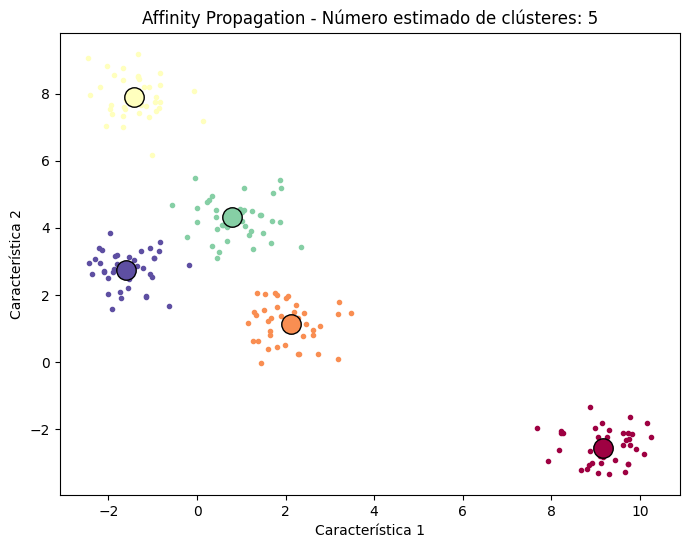

In [36]:
from sklearn.cluster import AffinityPropagation


# Aplicar Affinity Propagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X) # AQUI SE CAMBIA EL VALOR DE PREFERENCE
df['Etiqueta Agrupada'] = af.labels_
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)

# Mostrar el número de clústeres encontrados
print(f"Número estimado de clústeres: {n_clusters}")

# Visualización de los resultados del agrupamiento
plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

for k, col in zip(range(n_clusters), colors):
    class_members = (df['Etiqueta Agrupada'] == k)
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(df.loc[class_members, 'Característica 1'], df.loc[class_members, 'Característica 2'], '.', color=col)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

plt.title(f"Affinity Propagation - Número estimado de clústeres: {n_clusters}")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

Como es posible de ilustrar, entre mas bajo sea el parametro preference, se reduce el número de clusters que surgen del algoritmo.